In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
# Load dataset (replace with actual Kaggle dataset)
df = pd.read_csv("train.csv", parse_dates=["date"], index_col="date")
df = df.sort_index()

In [8]:
df.head(10)

,id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
2017-01-01,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2017-01-01,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
2017-01-01,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
2017-01-01,4,Argentina,Kaggle Learn,Using LLMs to Write Better,49
2017-01-01,5,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
2017-01-01,6,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
2017-01-01,7,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
2017-01-01,8,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83


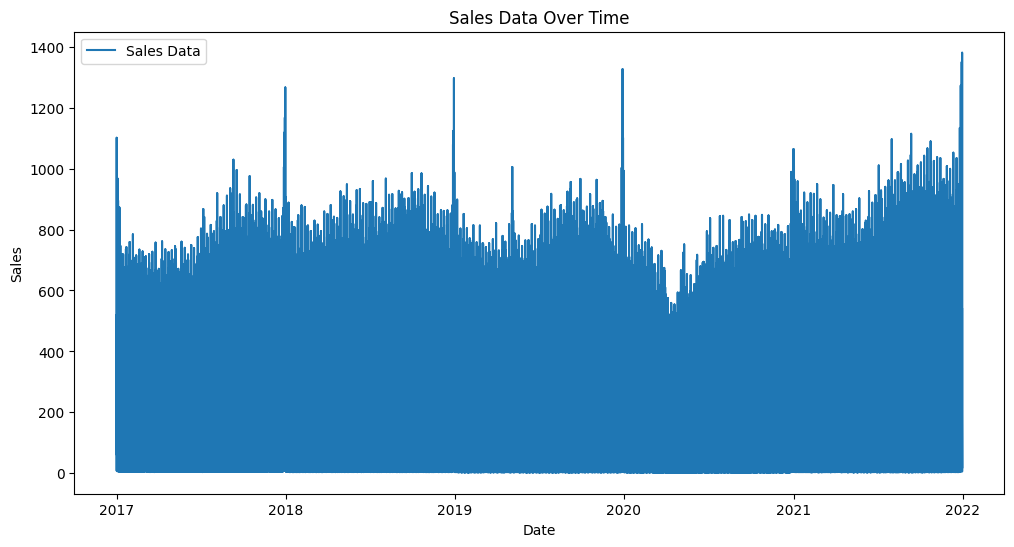

In [9]:
# Visualize data
plt.figure(figsize=(12, 6))
plt.plot(df["num_sold"], label="Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Data Over Time")
plt.legend()
plt.show()

In [10]:
# Data preprocessing
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[["num_sold"]])

In [11]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

In [12]:
#data_array = df["num_sold"].values
seq_length = 30  # Using past 30 days to predict next day
X, y = create_sequences(df_scaled, seq_length)

In [13]:
print(X[1])

[[0.04644412]
 [0.00507983]
 [0.0413643 ]
 [0.0341074 ]
 [0.06240929]
 [0.06966618]
 [0.00870827]
 [0.05878084]
 [0.04862119]
 [0.24528302]
 [0.26777939]
 [0.03701016]
 [0.26269956]
 [0.2053701 ]
 [0.14513788]
 [0.14296081]
 [0.02104499]
 [0.14513788]
 [0.09869376]
 [0.19738752]
 [0.20754717]
 [0.03265602]
 [0.19303338]
 [0.17924528]
 [0.75399129]
 [0.79753266]
 [0.11901306]
 [0.76923077]
 [0.62699565]
 [0.06531205]]


In [19]:
print(y[-1:0:-2])

[[0.38969521]
 [0.07910015]
 [0.5065312 ]
 ...
 [0.09433962]
 [0.05732946]
 [0.06313498]]


In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [21]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

109536 109536 27384 27384


In [22]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

In [23]:
model.compile(optimizer='adam', loss='mse')

In [24]:
# Train model
history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test))

6846/6846 [==============================] - 75s 11ms/step - loss: 0.0034 - val_loss: 0.0016


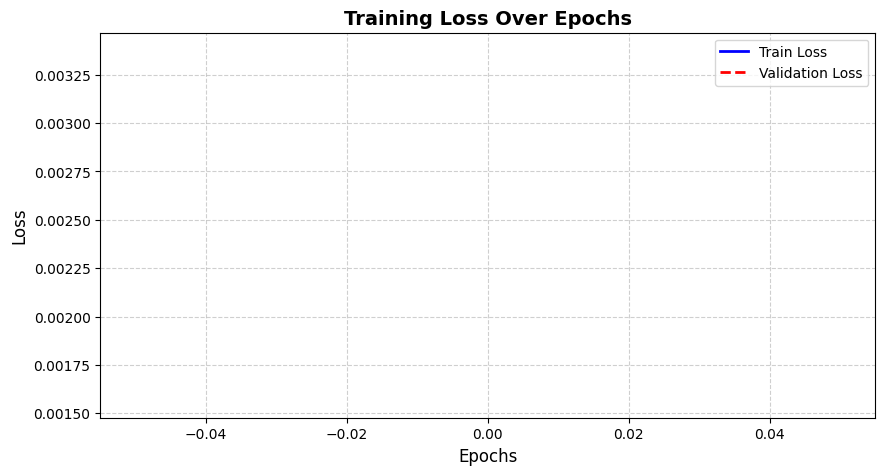

In [25]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2, linestyle='--')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [26]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

856/856 [==============================] - 4s 5ms/step


In [27]:
# Example prediction
example_idx = 100
example_date = df.index[len(df) - len(y_test) + example_idx]
print(f"Example Prediction Date: {example_date.strftime('%B %Y')}")
print(f"Actual Sales: {y_test_inv[example_idx][0]:.2f}")
print(f"Predicted Sales: {y_pred_inv[example_idx][0]:.2f}")

Example Prediction Date: January 2021
Actual Sales: 161.00
Predicted Sales: 126.02


In [28]:
# Example prediction
example_idx = 6
example_date = df.index[len(df) - len(y_test) + example_idx]
print(f"Example Prediction Date: {example_date.strftime('%B %Y')}")
print(f"Actual Sales: {y_test_inv[example_idx][0]:.2f}")
print(f"Predicted Sales: {y_pred_inv[example_idx][0]:.2f}")

Example Prediction Date: December 2020
Actual Sales: 83.00
Predicted Sales: 89.73


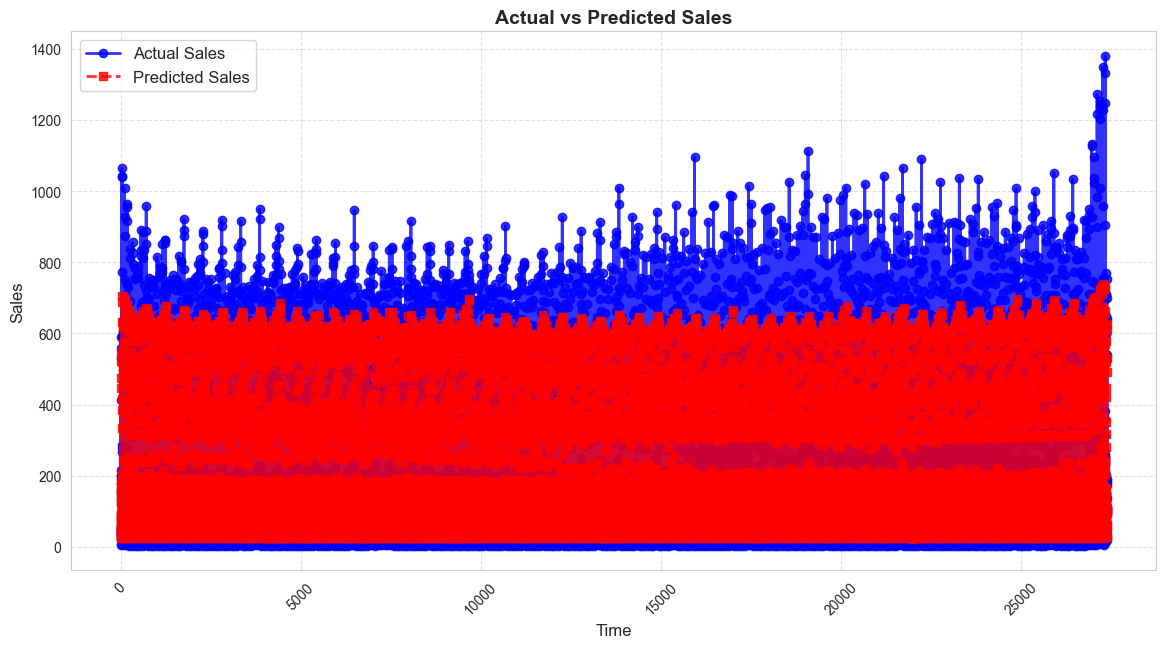

In [29]:
# Plot predictions
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
plt.plot(y_test_inv, label='Actual Sales', linestyle='-', marker='o', color='blue', alpha=0.8, linewidth=2)
plt.plot(y_pred_inv, label='Predicted Sales', linestyle='--', marker='s', color='red', alpha=0.8, linewidth=2)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Actual vs Predicted Sales', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [30]:
print("never gonna give you up")

never gonna give you up
